In [1]:
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import make_source_mask
from scipy.signal import convolve as scipy_convolve
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
from astropy.stats import sigma_clipped_stats
from astropy.convolution import Moffat2DKernel
from astropy.stats import mad_std
from astropy.stats import SigmaClip
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)

In [2]:
# Opening the images
from PIL import Image
hdul = fits.open('image.fit')
hdul.info()

img = fits.getdata('image2.fit')
bias = fits.getdata('bias.fit')
dark = fits.getdata('dark.fit')
flat = fits.getdata('flat.fit')

tmp = img/np.mean(img) * 128
im = Image.fromarray(tmp)
print(np.mean(tmp))
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save("raw.png")

from fonctions import *
bias = averageFolder('bias')
dark = averageFolder('dark')
flat = averageFolder('flat')

Filename: image.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      32   (6248, 4176)   int16 (rescales to uint16)   
127.99999999999974


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_5300/301236486.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ca = plt.colorbar()


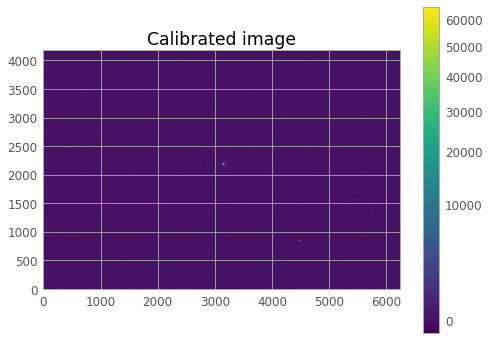

In [5]:
# Image calibrated using the different calibration frames
#from fonctions import *
image_clean = calibrate(img, bias, dark, flat)
#image_clean = image_clean - np.min(image_clean)
#image_clean = image_clean / np.max(image_clean) * (2**16-1)
plt.figure()
plt.title('Calibrated image')
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(image_clean, norm=norm, origin='lower', cmap='viridis', interpolation='none')
ca = plt.colorbar()
plt.show()
tmp = image_clean/np.mean(image_clean) * 128
im = Image.fromarray(tmp)
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save("calibrated.png")

BRUTE FORCE: mean, median, std = 563.2860155862903, 562.0, 10.378215529539215
CLIPPED: mean, median, std = 561.6164270891505, 562.0, 10.86210869412475
MASKED: mean, median, std = 561.5352216897991, 562.0, 10.828603201994513


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_5300/842673672.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


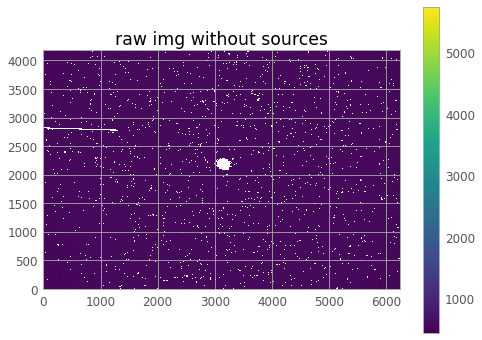

In [6]:
# SOURCE: https://photutils.readthedocs.io/en/stable/background.html

#just average estimate to characterise background
print('BRUTE FORCE: mean, median, std = {}, {}, {}'.format(np.mean(img), np.median(img), mad_std(img)))

# using clipped statistics to characterise background
mean, median, std = sigma_clipped_stats(img, sigma=3.0)
print('CLIPPED: mean, median, std = {}, {}, {}'.format(mean, median, std))

# masking sources
mask = make_source_mask(img, nsigma=3, npixels=5, dilate_size=11)
mean, median, std = sigma_clipped_stats(img, sigma=3.0, mask=mask)
masked_image = np.ma.masked_where(mask, img)
print('MASKED: mean, median, std = {}, {}, {}'.format(mean, median, std))
plt.figure()
plt.title('raw img without sources')
plt.imshow(masked_image, origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()

BRUTE FORCE: mean, median, std = 62.76520753626143, 61.03830677011201, 10.378215529539215
CLIPPED: mean, median, std = 61.10217862189393, 60.980071172810035, 9.718459208494888
MASKED: mean, median, std = 61.03467831525511, 60.92542453334984, 9.680627284648873


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_5300/1440868206.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


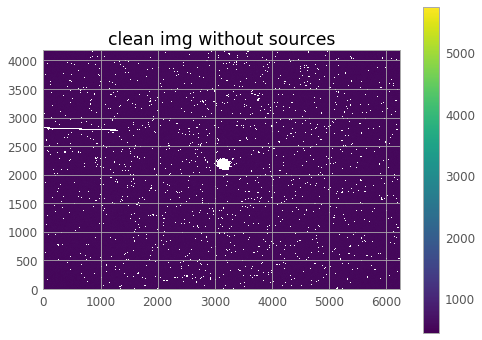

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_5300/1440868206.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


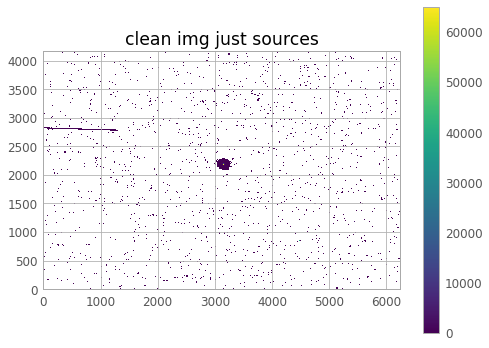

In [7]:
# SOURCE: https://photutils.readthedocs.io/en/stable/background.html

#just average estimate to characterise background
print('BRUTE FORCE: mean, median, std = {}, {}, {}'.format(np.mean(image_clean), np.median(image_clean), mad_std(img)))

# using clipped statistics to characterise background
mean, median, std = sigma_clipped_stats(image_clean, sigma=3.0)
print('CLIPPED: mean, median, std = {}, {}, {}'.format(mean, median, std))

# masking sources
mask = make_source_mask(image_clean, nsigma=3, npixels=5, dilate_size=11)
mean, median, std = sigma_clipped_stats(image_clean, sigma=3.0, mask=mask)
print('MASKED: mean, median, std = {}, {}, {}'.format(mean, median, std))
plt.figure()
plt.title('clean img without sources')
plt.imshow(masked_image, origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()

plt.figure()
plt.title('clean img just sources')
inverted_masked_image = np.ma.masked_where(np.logical_not(mask), image_clean)
plt.imshow(inverted_masked_image, origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_5300/1925358807.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


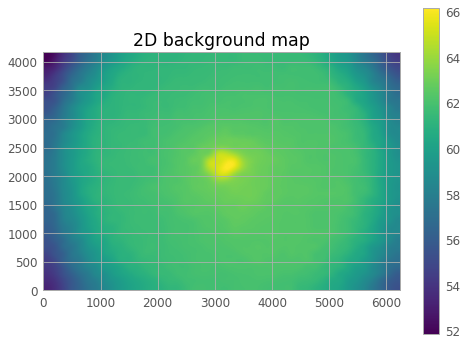

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_5300/1925358807.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


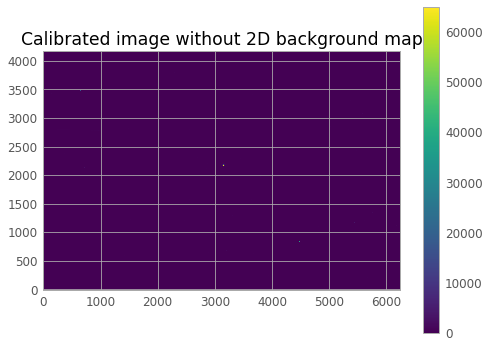

In [9]:
# Estimation of the 2D background value variation
sigma_clips = SigmaClip(sigma=4.0)
bkg_estimator = MedianBackground()
bkg = Background2D(image_clean, (116, 142), mask=mask, filter_size=(3,3), sigma_clip = sigma_clips, bkg_estimator=bkg_estimator)

plt.figure()
plt.title('2D background map')
plt.imshow(bkg.background, origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()

image_calibrated = image_clean - bkg.background
#image_calibrated = np.where(image_calibrated<0, 0, image_calibrated)
image_calibrated = -np.min(image_calibrated) + image_calibrated
plt.figure()
plt.title('Calibrated image without 2D background map')
plt.imshow(image_clean, origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()